<a href="https://colab.research.google.com/github/Sirilak-1447/229352-StatisticalLearning/blob/main/660510777_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [29]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

In [30]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

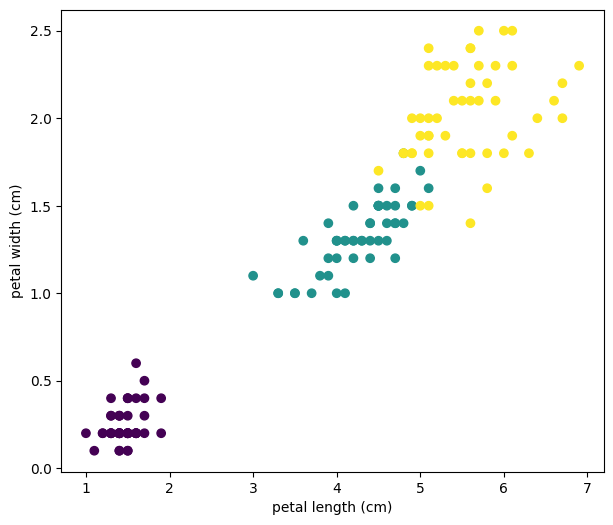

In [31]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [32]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [33]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

**What is the effect of C on the decision boundary?**

**ตอบ** ถ้า C มีค่าน้อย ขอบเขตการตัดสินใจจะมีความยืดหยุ่นน้อยส่งผลให้ margin กว้างขึ้น

  แต่ถ้า C มีค่ามาก ขอบเขตการตัดสินใจจะมีความยืดหยุ่นมากส่งผลให้ margin แคบลง

Text(0.5, 1.0, 'Linear SVC with C = 0.01 ')

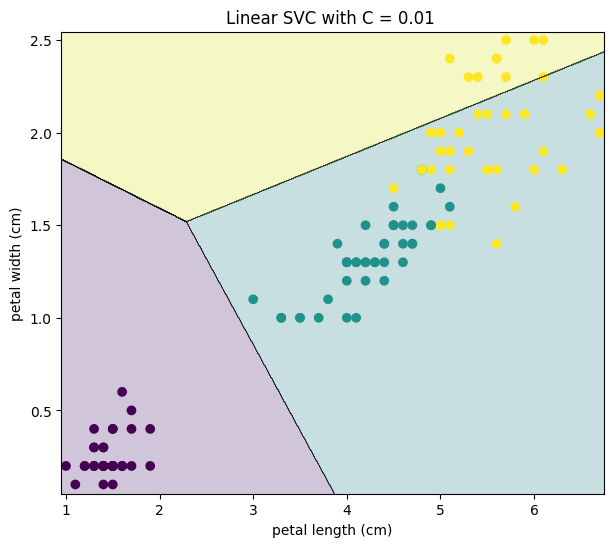

In [34]:
#TODO
lsvc = LinearSVC(C=0.01,loss='hinge', max_iter=100000)
lsvc.fit(X_train, y_train)
plot_decision_boundary(lsvc, X_train, y_train)
plt.title(f"Linear SVC with C = 0.01 ")

Text(0.5, 1.0, 'Linear SVC with C = 0.1 ')

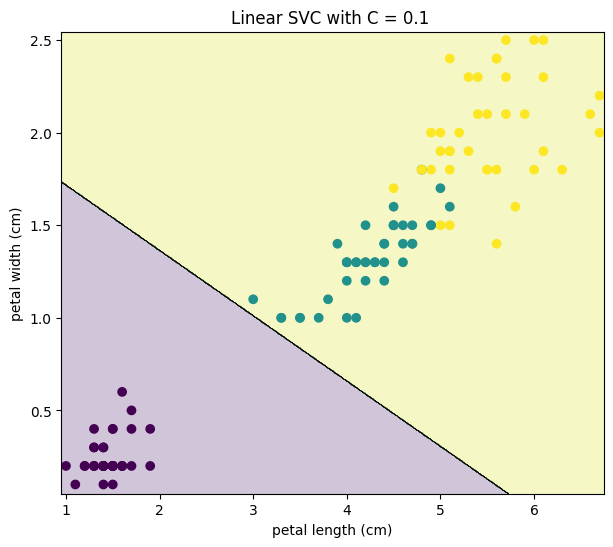

In [35]:
#TODO
lsvc = LinearSVC(C=0.1,loss='hinge', max_iter=100000)
lsvc.fit(X_train, y_train)
plot_decision_boundary(lsvc, X_train, y_train)
plt.title(f"Linear SVC with C = 0.1 ")

Text(0.5, 1.0, 'Linear SVC with C = 1.0 ')

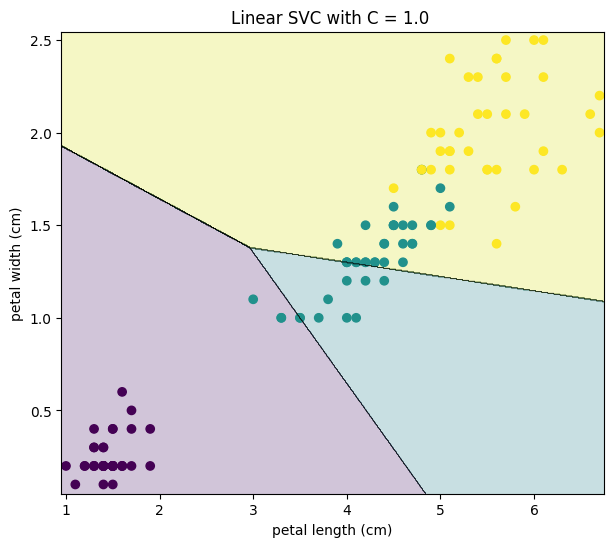

In [36]:
#TODO
lsvc = LinearSVC(C=1.0,loss='hinge', max_iter=100000)
lsvc.fit(X_train, y_train)
plot_decision_boundary(lsvc, X_train, y_train)
plt.title(f"Linear SVC with C = 1.0 ")

Text(0.5, 1.0, 'Linear SVC with C = 10.0 ')

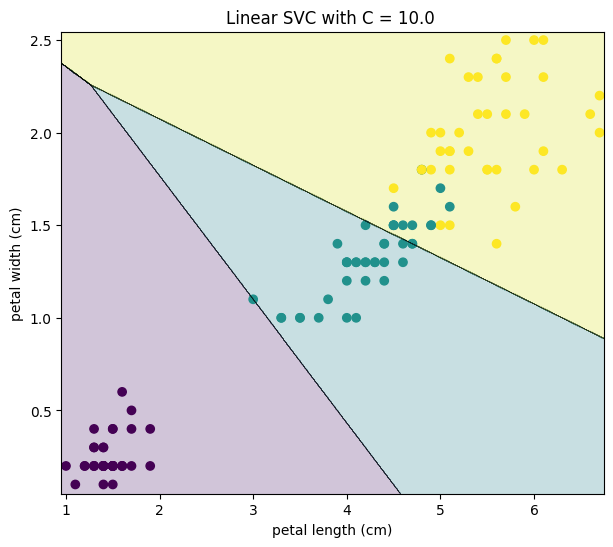

In [37]:
#TODO
lsvc = LinearSVC(C=10.0,loss='hinge', max_iter=100000)
lsvc.fit(X_train, y_train)
plot_decision_boundary(lsvc, X_train, y_train)
plt.title(f"Linear SVC with C = 10.0 ")

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [38]:
#TODO
C_like = 0.1

# Train the LinearSVC model with the chosen C
linear_svm = LinearSVC(loss='hinge', C=C_like , max_iter=100000, dual=True)
linear_svm.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_svm.predict(X_test)
test_error = 1 - linear_svm.score(X_test, y_test)

print(f"Test error for Linear SVC with C = {C_like}: {test_error}")

Test error for Linear SVC with C = 0.1: 0.30000000000000004


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

**What is the effect of gamma on the decision boundary?**

**ตอบ** เมื่อ gamma มีค่าน้อย เส้นแบ่ง (decision boundary) จะเรียบและเปลี่ยนช้า

แต่ถ้า เมื่อ gamma มีค่ามาก เส้นแบ่ง(decision boundary) จะซับซ้อนและบิดไปตามจุดข้อมูลใกล้ๆ

Text(0.5, 1.0, 'Kernel SVC with gamma = 0.01, C = 1.0')

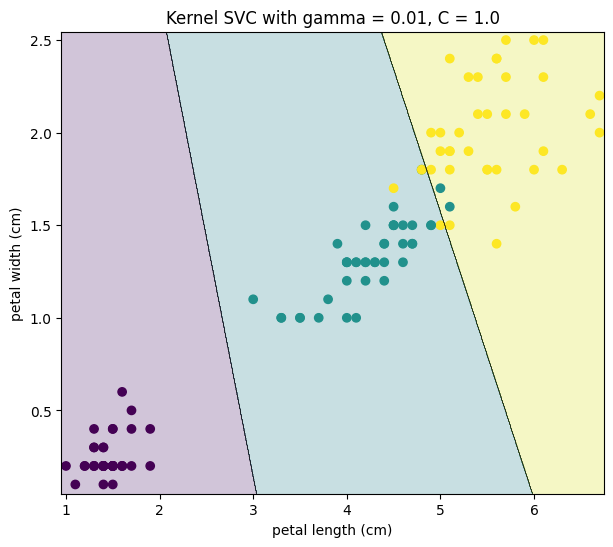

In [39]:

#TODO
svc = SVC(kernel='rbf', C=1.0, gamma=0.01, max_iter=10000)
svc.fit(X, y)
plot_decision_boundary(svc, X_train, y_train)
plt.title(f"Kernel SVC with gamma = 0.01, C = 1.0")

Text(0.5, 1.0, 'Kernel SVC with gamma = 0.1, C = 1.0')

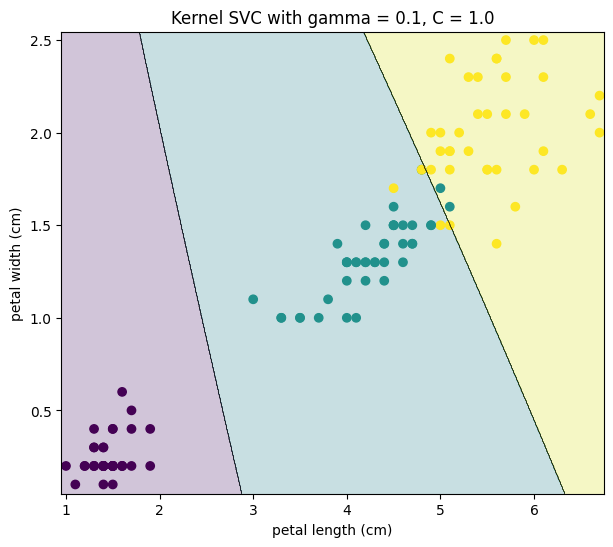

In [40]:
#TODO
svc = SVC(kernel='rbf', C=1.0, gamma=0.1, max_iter=10000)
svc.fit(X, y)
plot_decision_boundary(svc, X_train, y_train)
plt.title(f"Kernel SVC with gamma = 0.1, C = 1.0")

Text(0.5, 1.0, 'Kernel SVC with gamma = 1.0, C = 1.0')

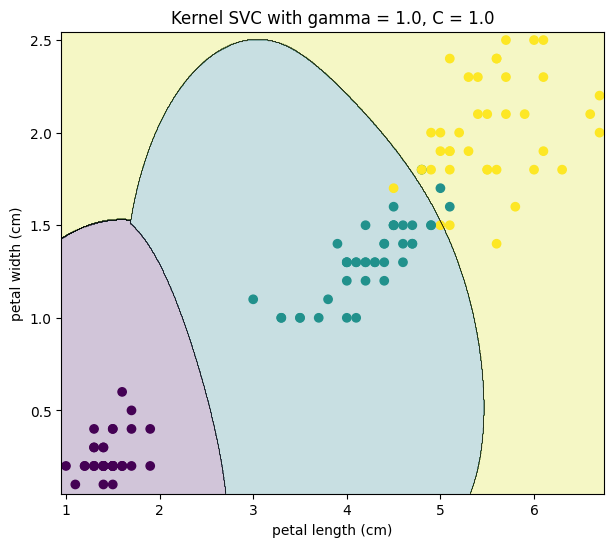

In [41]:
#TODO
svc = SVC(kernel='rbf', C=1.0, gamma=1.0, max_iter=10000)
svc.fit(X, y)
plot_decision_boundary(svc, X_train, y_train)
plt.title(f"Kernel SVC with gamma = 1.0, C = 1.0")

Text(0.5, 1.0, 'Kernel SVC with gamma = 10.0, C = 1.0')

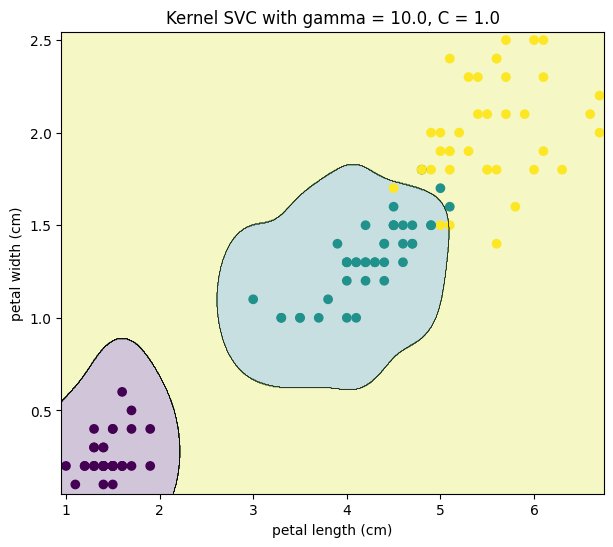

In [42]:
#TODO
svc = SVC(kernel='rbf', C=1.0, gamma=10.0, max_iter=10000)
svc.fit(X, y)
plot_decision_boundary(svc, X_train, y_train)
plt.title(f"Kernel SVC with gamma = 10.0, C = 1.0")

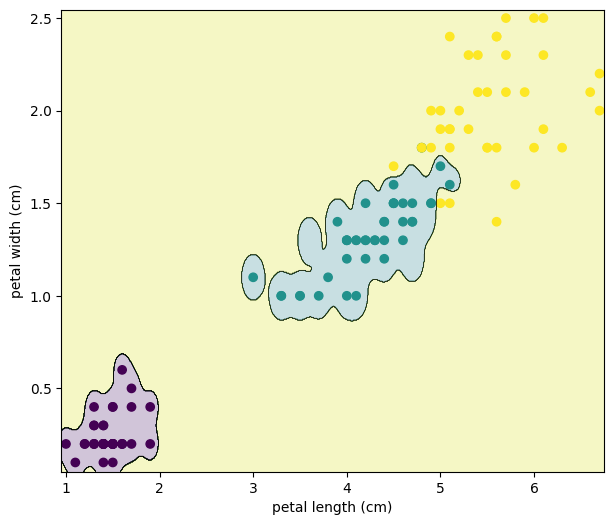

In [43]:
#TODO
svc = SVC(kernel='rbf', C=1.0, gamma=100.0, max_iter=10000)
svc.fit(X, y)
plot_decision_boundary(svc, X_train, y_train)

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [44]:
#TODO
gamma_like = 100.0
kernel_svc = SVC(kernel='rbf', C=1.0, gamma=gamma_like, max_iter=100000)
kernel_svc.fit(X_train, y_train)

y_pred_kernel = kernel_svc.predict(X_test)
test_error_kernel = np.mean(y_pred_kernel != y_test)
print(f"Test error with gamma={gamma_like}: {test_error_kernel}")

n_support_vectors = kernel_svc.support_vectors_.shape[0]
print(f"Number of support vectors with gamma:{gamma_like} = {n_support_vectors}")

Test error with gamma=100.0: 0.06666666666666667
Number of support vectors with gamma:100.0 = 92


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [45]:
from sklearn.metrics import accuracy_score

linear_svm = SVC(kernel='linear', C=C_like) # Using the C value chosen in Exercise 3
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy of Linear SVM (C={C_like}): {accuracy_linear:.4f}")

gamma_like = 10.0
kernel_svm_rbf = SVC(kernel='rbf', C=1.0, gamma=gamma_like) # Using C=1.0 and gamma chosen in Exercise 5
kernel_svm_rbf.fit(X_train, y_train)
y_pred_kernel_rbf = kernel_svm_rbf.predict(X_test)
accuracy_kernel_rbf = accuracy_score(y_test, y_pred_kernel_rbf)
print(f"Accuracy of Kernel SVM (RBF, C=1.0, gamma={gamma_like}): {accuracy_kernel_rbf:.4f}")

Accuracy of Linear SVM (C=0.1): 1.0000
Accuracy of Kernel SVM (RBF, C=1.0, gamma=10.0): 1.0000


**1.Explain using test accuracy**

**ตอบ** Kernel SVM ได้ accuracy สูงกว่า Linear SVM เพราะสามารถจับขอบเขตที่ไม่เป็นเส้นตรงได้ดี กรณีที่ข้อมูลมีความซับซ้อนKernel SVM จะจำแนกข้อมูลได้ดีกว่า

**2.Explaing using decision boundary plot**

**ตอบ** จากกราฟ Kernel SVM จะมี decision boundary ที่ complex และสามารถล้อมครอบกลุ่มข้อมูลได้ดีกว่า Linear SVM

**สรุป** ถ้าข้อมูลง่าย แยกเป็นเส้นตรงได้ ควรใช้ Linear SVM แต่ถ้าข้อมูลมีขอบเขตซับซ้อน ควรใช้ Kernel SVM